# Packages

The cell below contains the packages that are used in the code.

In [1]:
from mesa.batchrunner import BatchRunner
from IconicityModel import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# BatchRunner

## Helper functions

Runs the batchrunner for a certain amount of episodes and steps.

In [2]:
def run_batchrunner(model, fixed_pm, variable_pm, nb_iterations, nb_steps):
    batch_run = BatchRunner(model,
                           variable_pm,
                           fixed_pm,
                           iterations = nb_iterations,
                           max_steps = nb_steps,
                           model_reporters={"Total avg. iconicity": compute_total_average_iconicity,
                                            "L1 avg. iconicity": compute_l1_average_iconicity,
                                            "L2 avg. iconicity": compute_l2_average_iconicity})
    batch_run.run_all()
    return batch_run.get_model_vars_dataframe()

def print_dataframe(dataframe, variable_pm):
    return dataframe[[variable_pm, "Run", "L1 avg. iconicity", "L2 avg. iconicity", "Total avg. iconicity"]]

Calculates the average iconicity for each iteration.

In [3]:
def calculate_data_per_iteration(data, pm_values, nb_iterations):
    avg_results = []
    max_results = []
    min_results = []
    
    for i in range(0, nb_iterations * len(pm_values), nb_iterations):
        raw_results = np.asarray(data[i:i + nb_iterations].tolist())
        avg_results.append(np.mean(raw_results))
        max_results.append(np.max(raw_results))
        min_results.append(np.min(raw_results))
    
    return np.asarray(avg_results), np.asarray(max_results), np.asarray(min_results)

Selects the data from the dataframe and generates the labels to plot by calling plot_average_iconicity.

In [4]:
def plot_average_iconicities(df, pm_values, x_label, nb_iterations):
    l1_df = df["L1 avg. iconicity"]
    l2_df = df["L2 avg. iconicity"]
    total_df = df["Total avg. iconicity"]
    
    l1_avg, l1_max, l1_min = calculate_data_per_iteration(l1_df, pm_values, nb_iterations)
    l2_avg, l2_max, l2_min = calculate_data_per_iteration(l2_df, pm_values, nb_iterations)
    total_avg, total_max, total_min = calculate_data_per_iteration(total_df, pm_values, nb_iterations)

    l1_df = plot_data(x_label, pm_values, "L1 iconicity level", l1_avg, l1_max, l1_min)
    l2_df = plot_data(x_label, pm_values, "L2 iconicity level", l2_avg, l2_max, l2_min)
    total_df = plot_data(x_label, pm_values, "Total iconicity level", total_avg, total_max, total_min)

Plots the iconicity levels given the data and the labels.

In [5]:
def plot_data(x_label, x_data, y_label, means, maxs, mins):
    
    plt.errorbar(x_data, means,
                    yerr=[means - mins, maxs - means],
                    uplims=True,
                    lolims=True,
                    fmt='.k',
                    ecolor='red',
                    lw=1)
    plt.bar(x_data, means, width=8)
    
    plt.xticks(x_data)
    plt.yticks(np.arange(0, 120, 20))
    
    plt.title(y_label)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    plt.show()

## Parameter exploration

### L2 replace chance

First we try several proportions for the replacement policy. Each value represents the chance of an agent being replaced by an L2 agent.

In [6]:
# define the values of the variable pm and amount of iterations and steps per iteration
proportions = [25, 50, 75]
nb_iterations = 10
nb_steps = 100

# define the fixed and variable parameters
fixed_pm = {"width": 10,
            "height": 10,
            "vocab_size": 10,
            "word_length": 5,
            "turnover_chance": 20,
            "turnover_threshold": 10,
            "initial_degree_of_iconicity": 100,
            "learning_error_degree": 20,
            "l2_radius": 100}
variable_pm = {"l2_replace_chance": proportions}

# run the batchrunner
df = run_batchrunner(IconicityModel, fixed_pm, variable_pm, nb_iterations, nb_steps)

# print the statistics
print("STATISTICS FOR L2 REPLACEMENT CHANCE PARAMETER EXPLORATION")
print(" - Possible values: " + str(proportions))
print(" - Ran for " + str(nb_iterations) + " iteration(s) and " + str(nb_steps) + " steps per iteration")
print(" - Data from running the model for " + str(nb_iterations) + " iteration(s) for each parameter value:")
#print_dataframe(df, "l2_replace_chance")
filtered_df = print_dataframe(df, "l2_replace_chance")
l1_avg_icon = df["L1 avg. iconicity"].tolist()
l2_avg_icon = df["L2 avg. iconicity"].tolist()
total_avg_icon = df["Total avg. iconicity"].tolist()

30it [1:42:53, 205.77s/it]

STATISTICS FOR L2 REPLACEMENT CHANCE PARAMETER EXPLORATION
 - Possible values: [25, 50, 75]
 - Ran for 10 iteration(s) and 100 steps per iteration
 - Data from running the model for 10 iteration(s) for each parameter value:


 - Iconicity levels from running the model for 10 iteration(s) for each parameter value:


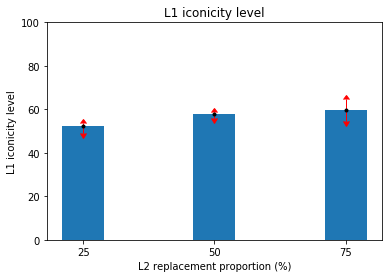

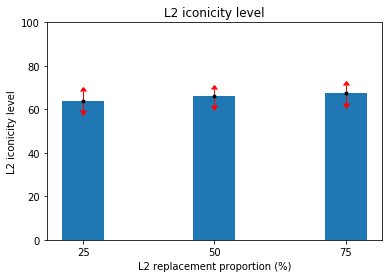

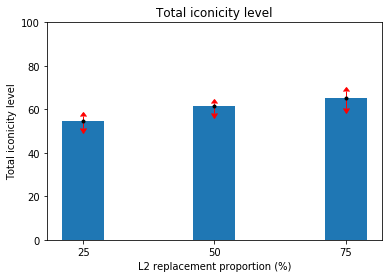

In [7]:
# draw L2 replacement proportion PM exploration
print(" - Iconicity levels from running the model for " + str(nb_iterations) + " iteration(s) for each parameter value:")
plot_average_iconicities(df, proportions, "L2 replacement proportion (%)", nb_iterations)

### L2 radius

Then we try several radiuses from which an L2 learner can acquire signs from.

In [8]:
# define the values of the variable pm and amount of iterations and steps per iteration
radiuses = [1, 25, 50, 75, 100]
nb_iterations = 10
nb_steps = 100

# define the fixed and variable parameters
fixed_pm = {"width": 10,
            "height": 10,
            "vocab_size": 10,
            "word_length": 5,
            "turnover_chance": 20,
            "turnover_threshold": 10,
            "initial_degree_of_iconicity": 100,
            "learning_error_degree": 20,
            "l2_replace_chance": 50}
variable_pm = {"l2_radius": radiuses}

# run the batchrunner
df = run_batchrunner(IconicityModel, fixed_pm, variable_pm, nb_iterations, nb_steps)

# print the statistics
print("STATISTICS FOR L2 LEARNING RADIUS PARAMETER EXPLORATION")
print(" - Possible values: " + str(radiuses))
print(" - Ran for " + str(nb_iterations) + " iteration(s) and " + str(nb_steps) + " steps per iteration\n")
print(" - Data from running the model for " + str(nb_iterations) + " iteration(s) for each parameter value:")
print_dataframe(df, "l2_radius")

50it [1:05:20, 78.40s/it] 

STATISTICS FOR L2 LEARNING RADIUS PARAMETER EXPLORATION
 - Possible values: [1, 25, 50, 75, 100]
 - Ran for 10 iteration(s) and 100 steps per iteration

 - Data from running the model for 10 iteration(s) for each parameter value:


,l2_radius,Run,L1 avg. iconicity,L2 avg. iconicity,Total avg. iconicity
0,1,0,52.98,67.96,60.32
1,1,1,57.96,68.18,62.46
2,1,2,60.26,70.17,64.82
3,1,3,59.59,69.67,63.82
4,1,4,57.83,68.86,62.46
5,1,5,56.72,69.57,62.12
6,1,6,59.12,70.68,64.90
7,1,7,57.39,70.36,63.10
8,1,8,58.64,69.19,63.60
9,1,9,53.82,68.29,58.74


 - Iconicity levels from running the model for 10 iteration(s) for each parameter value:


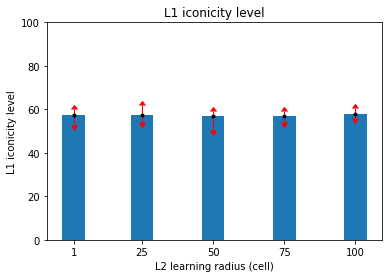

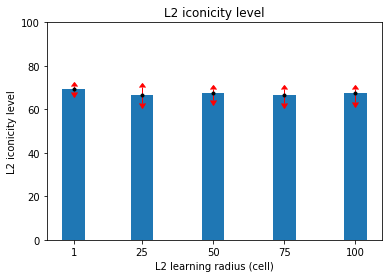

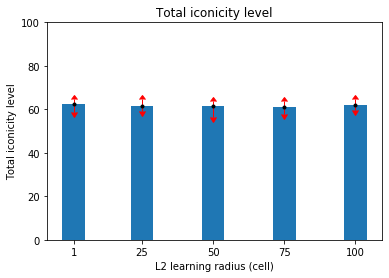

In [9]:
# draw L2 learning radius PM exploration
print(" - Iconicity levels from running the model for " + str(nb_iterations) + " iteration(s) for each parameter value:")
plot_average_iconicities(df, radiuses, "L2 learning radius (cell)", nb_iterations)

### Turnover chance

Then we try the turnover chance of the agents. This will determine the chance of an agent dying when it has reached age 2 or higher.

In [10]:
# define the values of the variable pm and amount of iterations and steps per iteration
chances = [10, 30, 50, 70, 90]
nb_iterations = 10
nb_steps = 100

# define the fixed and variable parameters
fixed_pm = {"width": 10,
            "height": 10,
            "vocab_size": 10,
            "word_length": 5,
            "turnover_threshold": 10,
            "initial_degree_of_iconicity": 100,
            "learning_error_degree": 20,
            "l2_radius": 100,
            "l2_replace_chance": 50}
variable_pm = {"turnover_chance": chances}

# run the batchrunner
df = run_batchrunner(IconicityModel, fixed_pm, variable_pm, nb_iterations, nb_steps)

# print the statistics
print("STATISTICS FOR TURNOVER CHANCE PARAMETER EXPLORATION")
print(" - Possible values: " + str(chances))
print(" - Ran for " + str(nb_iterations) + " iteration(s) and " + str(nb_steps) + " steps per iteration\n")
print(" - Data from running the model for " + str(nb_iterations) + " iteration(s) for each parameter value:")
print_dataframe(df, "turnover_chance")

50it [2:34:41, 185.63s/it]

STATISTICS FOR TURNOVER CHANCE PARAMETER EXPLORATION
 - Possible values: [10, 30, 50, 70, 90]
 - Ran for 10 iteration(s) and 100 steps per iteration

 - Data from running the model for 10 iteration(s) for each parameter value:


,turnover_chance,Run,L1 avg. iconicity,L2 avg. iconicity,Total avg. iconicity
0,10,0,59.88,67.65,63.84
1,10,1,59.46,70.04,64.96
2,10,2,56.35,67.89,60.62
3,10,3,54.98,70.15,61.20
4,10,4,55.27,67.46,61.12
5,10,5,57.93,70.14,63.06
6,10,6,59.54,68.14,63.32
7,10,7,60.04,72.28,65.30
8,10,8,59.52,70.71,64.22
9,10,9,56.88,68.29,61.56


 - Iconicity levels from running the model for 10 iteration(s) for each parameter value:


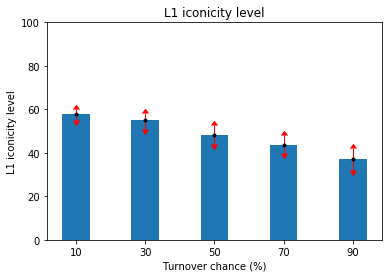

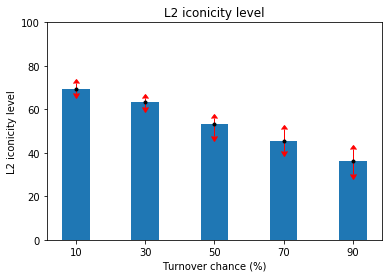

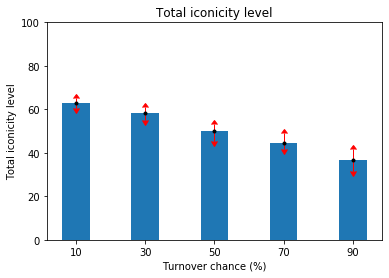

In [11]:
# draw turnover chance PM exploration
print(" - Iconicity levels from running the model for " + str(nb_iterations) + " iteration(s) for each parameter value:")
plot_average_iconicities(df, chances, "Turnover chance (%)", nb_iterations)

### Learning error degree

Next up is the learning error degree; we will test various values that determine the error an agent makes while acquiring the phonological component of a sign.

In [12]:
# define the values of the variable pm and amount of iterations and steps per iteration
errors = [20, 40, 60, 80]
nb_iterations = 10
nb_steps = 100

# define the fixed and variable parameters
fixed_pm = {"width": 10,
            "height": 10,
            "vocab_size": 10,
            "word_length": 5,
            "turnover_chance": 20,
            "turnover_threshold": 10,
            "initial_degree_of_iconicity": 100,
            "l2_radius": 100,
            "l2_replace_chance": 50}
variable_pm = {"learning_error_degree": errors}

# run the batchrunner
df = run_batchrunner(IconicityModel, fixed_pm, variable_pm, nb_iterations, nb_steps)

# print the statistics
print("STATISTICS FOR LEARNING ERROR DEGREE PARAMETER EXPLORATION")
print(" - Possible values: " + str(errors))
print(" - Ran for " + str(nb_iterations) + " iteration(s) and " + str(nb_steps) + " steps per iteration\n")
print(" - Data from running the model for " + str(nb_iterations) + " iteration(s) for each parameter value:")
print_dataframe(df, "learning_error_degree")

40it [2:15:21, 203.04s/it]

STATISTICS FOR LEARNING ERROR DEGREE PARAMETER EXPLORATION
 - Possible values: [20, 40, 60, 80]
 - Ran for 10 iteration(s) and 100 steps per iteration

 - Data from running the model for 10 iteration(s) for each parameter value:


,learning_error_degree,Run,L1 avg. iconicity,L2 avg. iconicity,Total avg. iconicity
0,20,0,56.19,66.00,60.80
1,20,1,57.58,67.00,62.48
2,20,2,56.08,62.33,59.14
3,20,3,58.73,66.31,62.14
4,20,4,57.96,65.49,61.80
5,20,5,55.09,64.09,59.14
6,20,6,57.55,69.36,63.10
7,20,7,59.77,68.67,63.24
8,20,8,61.15,66.50,63.72
9,20,9,54.77,66.46,60.38


 - Iconicity levels from running the model for 10 iteration(s) for each parameter value:


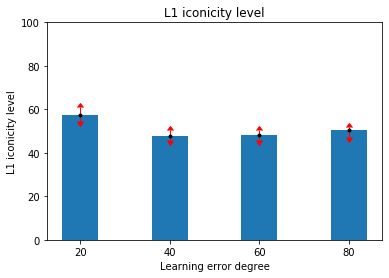

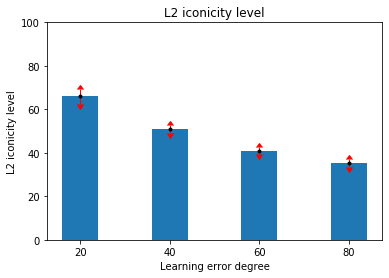

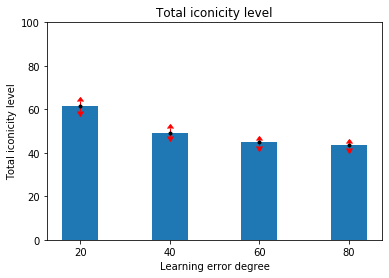

In [13]:
# draw learning error degree PM exploration
print(" - Iconicity levels from running the model for " + str(nb_iterations) + " iteration(s) for each parameter value:")
plot_average_iconicities(df, errors, "Learning error degree", nb_iterations)